In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dirname = '/Users/austinlasseter/DSI-EC-2/projects/datasets/proj_3/'
data = pd.read_csv(dirname + 'data.csv')
data.head()

,title,subreddit,comments,minutes
0,"""@TheBigJamesG: What kind of president doesn't...",TrumpCriticizesTrump,205,720
1,"""Alright Pinchy, my little bucket of badness, ...",lego,122,960
2,"""Are you my Dad?""",aww,10,120
3,"""Behold a Pale Horse"" book from 1991, by Bill ...",CBTS_Stream,4,180
4,"""Can I have a 5p bag with that?"". ""Sorry, we o...",britishproblems,366,660


## Exploration

In [3]:
# How big is our dataet?
data.shape

(4793, 4)

In [4]:
# There is no missing data
data.isnull().sum()

title        0
subreddit    0
comments     0
minutes      0
dtype: int64

### Exploring the Target Variable

In [5]:
x=list((data['title'].head(3)))
x

['"@TheBigJamesG: What kind of president doesn\'t get playing golf after a cruel beheading isn\'t the thing to do? Detached from reality he is" 8:25 AM - 9 Sep 2014',
 '"Alright Pinchy, my little bucket of badness, it\'s time to finally put Twinkle Toes\' lights out!" - Diesel 10 MOC',
 '"Are you my Dad?"']

In [6]:
# convert all titles and subreddits to lower case
data['title']=data['title'].apply(lambda x: x.lower())

In [7]:
# confirm that did what we wanted
print(x)
data['title'].head()

['"@TheBigJamesG: What kind of president doesn\'t get playing golf after a cruel beheading isn\'t the thing to do? Detached from reality he is" 8:25 AM - 9 Sep 2014', '"Alright Pinchy, my little bucket of badness, it\'s time to finally put Twinkle Toes\' lights out!" - Diesel 10 MOC', '"Are you my Dad?"']


0    "@thebigjamesg: what kind of president doesn't...
1    "alright pinchy, my little bucket of badness, ...
2                                    "are you my dad?"
3    "behold a pale horse" book from 1991, by bill ...
4    "can i have a 5p bag with that?". "sorry, we o...
Name: title, dtype: object

In [8]:
# The mean comment is way higher than the median. There must be some serious outliers.
print(data['comments'].median())
print(data['comments'].mean())
data['comments'].describe()

71.0
242.74045482996036


count     4793.000000
mean       242.740455
std        708.030568
min          1.000000
25%         25.000000
50%         71.000000
75%        189.000000
max      14578.000000
Name: comments, dtype: float64

In [9]:
# What percent of posts have more than 2,000 comments?
((data[data['comments']>2000]['comments'].count())/len(data))*100

1.6482370123096182

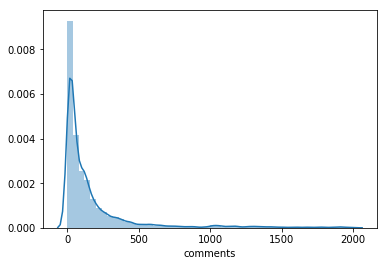

In [10]:
# What's the distribution of the posts with fewer than 2000 comments?
sns.distplot(data[data['comments']<2000]['comments']);
# The great majority have less than 500 comments.

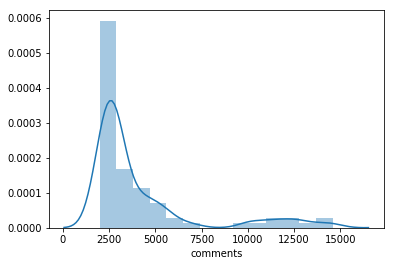

In [11]:
# What's the distribution of the posts with more than 2000 comments?
sns.distplot(data[data['comments']>=2000]['comments']);

In [12]:
# What are the top five posts with the most comments?
data[data['comments']>=10000].sort_values(by='comments', ascending=False).head(5)

,title,subreddit,comments,minutes
2903,race thread: mencs daytona 500 at daytona inte...,NASCAR,14578,240
4142,"what ""i know it sounds weird, but just try it""...",AskReddit,13892,360
346,american gun owners of reddit who have moved t...,AskReddit,12809,780
448,australia's response under a conservative gove...,pics,12656,240
3794,this is what democracy looks like. view from t...,pics,12072,900


In [13]:
# What the heck is that post with 15,000 comments??
list(data.loc[data['comments']>=14000, 'title'])
# It's a NASCAR race thread.

['race thread: mencs daytona 500 at daytona international speedway, starting at 2:50pm est on fox (mencs1)']

### subreddit

In [14]:
# How many unique subreddits are there?
print('unique subreddits:', data['subreddit'].nunique())
print('what percentage of the data is that?', 100*data['subreddit'].nunique()/len(data))

unique subreddits: 968
what percentage of the data is that? 20.196119340705195


In [15]:
# Which subreddits are most popular, by number of posts?
subs=data.groupby('subreddit')['subreddit'].value_counts().sort_values(ascending=False)
subs.head(15)

subreddit           subreddit         
funny               funny                 169
aww                 aww                   142
pics                pics                  109
gaming              gaming                 91
BlackPeopleTwitter  BlackPeopleTwitter     88
FortNiteBR          FortNiteBR             72
gifs                gifs                   72
todayilearned       todayilearned          66
news                news                   51
PrequelMemes        PrequelMemes           51
worldnews           worldnews              46
mildlyinteresting   mildlyinteresting      42
FireEmblemHeroes    FireEmblemHeroes       40
videos              videos                 38
AskReddit           AskReddit              36
Name: subreddit, dtype: int64

4.9514462809917354


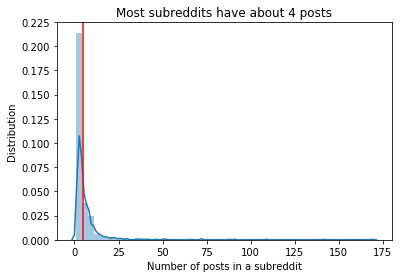

In [16]:
# Most subreddits have 
print(subs.mean())
ax=sns.distplot(subs)
plt.axvline(x=subs.mean(), color='red');
ax.set(ylabel='Distribution', xlabel='Number of posts in a subreddit', title='Most subreddits have about 4 posts')
plt.show;

In [17]:
# Which subreddits are most popular, in terms of max comments on a single post?
data.groupby('subreddit')['comments'].max().sort_values(ascending=False).head(15)

subreddit
NASCAR                 14578
AskReddit              13892
pics                   12656
technology             10277
news                    6960
beholdthemasterrace     6200
todayilearned           5472
nottheonion             5410
JusticeServed           4474
videos                  4381
PoliticalHumor          4200
Showerthoughts          3170
australia               3112
worldnews               3023
gaming                  3001
Name: comments, dtype: int64

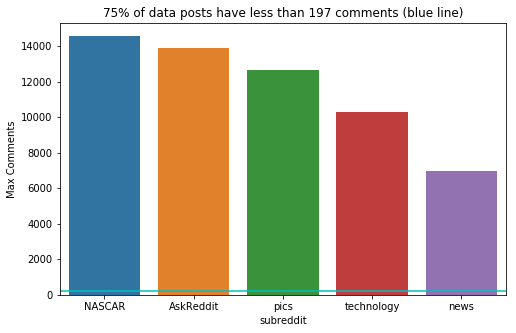

In [18]:
# Let's take a visual view of those top five subreddits, by max number of comments in each.
bars=pd.DataFrame(data.groupby('subreddit')['comments'].max().sort_values(ascending=False).head(5))
bars.reset_index(inplace=True)
fig = plt.figure(figsize=(8,5))
ax=sns.barplot(x=bars['subreddit'], y=bars['comments'])
ax.set(ylabel='Max Comments', xlabel='subreddit', title='75% of data posts have less than 197 comments (blue line)')
plt.axhline(y=197, color='c');
plt.show;

In [19]:
# Which subreddits are most popular, in terms of total comments?
print('The median number of comments by subreddit', data.groupby('subreddit')['comments'].sum().describe())
data.groupby('subreddit')['comments'].sum().sort_values(ascending=False).head(15)

The median number of comments by subreddit count       968.000000
mean       1201.916322
std        5847.301565
min           1.000000
25%          24.000000
50%         115.000000
75%         549.500000
max      123390.000000
Name: comments, dtype: float64


subreddit
AskReddit             123390
pics                   67022
news                   56416
todayilearned          46754
worldnews              37422
funny                  34027
gaming                 30144
videos                 27044
gifs                   23694
technology             23622
aww                    22347
movies                 20233
PoliticalHumor         15720
NASCAR                 14839
BlackPeopleTwitter     14659
Name: comments, dtype: int64

## Categorical variable for most popular subreddits

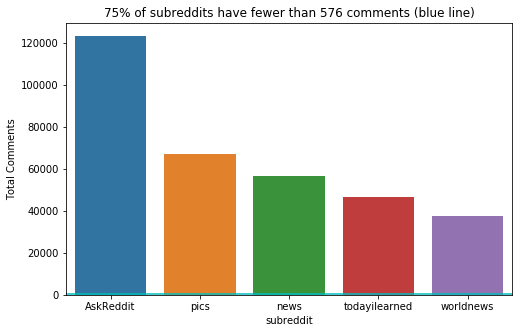

In [20]:
# Let's take a visual view of those top five subreddits, by total number of comments in each.
bars=pd.DataFrame(data.groupby('subreddit')['comments'].sum().sort_values(ascending=False).head(5))
bars.reset_index(inplace=True)
fig = plt.figure(figsize=(8,5))
ax=sns.barplot(x=bars['subreddit'], y=bars['comments'])
ax.set(ylabel='Total Comments', xlabel='subreddit', title='75% of subreddits have fewer than 576 comments (blue line)')
plt.axhline(y=576, color='c');

In [21]:
# create a categorical variable, measuring if it's in those most popular subreddits.
data['which_sub']='others'
data.loc[data['subreddit'].isin(['pics', 'news', 'todayilearned', 'funny']), 'which_sub']='big4'
data.loc[data['subreddit'].isin(['AskReddit']), 'which_sub']='AskReddit'
# Confirm that did what we wanted it to:
print(data[data['subreddit']=='AskReddit']['which_sub'].head(3))
print(data[data['subreddit']=='pics']['which_sub'].head(3))
data['which_sub'].value_counts()

156    AskReddit
346    AskReddit
520    AskReddit
Name: which_sub, dtype: object
93     big4
142    big4
143    big4
Name: which_sub, dtype: object


others       4362
big4          395
AskReddit      36
Name: which_sub, dtype: int64

AskReddit 1870.5
big4 137.0
others 64.5


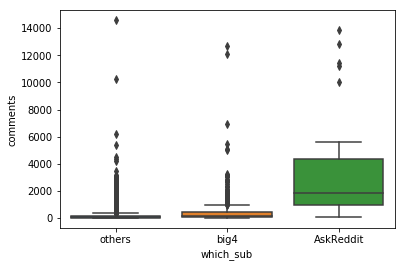

In [22]:
# Any correlation with comments? Yes. The average number of comments is much higher depending on the subreddit.
print('AskReddit', data[data['which_sub']=='AskReddit']['comments'].median())
print('big4', data[data['which_sub']=='big4']['comments'].median())
print('others', data[data['which_sub']=='others']['comments'].median())
sns.boxplot(x='which_sub', y='comments', data=data);

In [23]:
# There are only 25 posts in the "AskReddit" subreddit. Is one of them an outlier?
ask=data[data['subreddit']=='AskReddit']
print('how many posts in this subreddit?', len(ask))
ask.sort_values('comments', ascending=False).head(10)
# There's a post in there with 13,000 comments.

how many posts in this subreddit? 36


,title,subreddit,comments,minutes,which_sub
4142,"what ""i know it sounds weird, but just try it""...",AskReddit,13892,360,AskReddit
346,american gun owners of reddit who have moved t...,AskReddit,12809,780,AskReddit
4173,what is the dumbest thing you’ve ever done for...,AskReddit,11464,660,AskReddit
2937,"reddit, what video games have you soft-locked ...",AskReddit,11175,1020,AskReddit
4176,what is the most interesting documentary you'v...,AskReddit,10034,420,AskReddit
4177,what is the smartest thing you've ever done?,AskReddit,5606,540,AskReddit
1491,how did you lose the genetic lottery?,AskReddit,5287,720,AskReddit
156,a british charity that helps victims of forced...,AskReddit,4555,420,AskReddit
4169,"what is a common ""fact"" that you know is bulls...",AskReddit,4395,780,AskReddit
4192,what was a strange experience you had as a chi...,AskReddit,4333,540,AskReddit


In [24]:
# What does that comment say?
list(ask.loc[ask['comments']>=12000, 'title'])
# It's about gun control. Aftershock of the Parkland, FL school shooting.

['american gun owners of reddit who have moved to a country with strict gun-control, what has this been like, what are the differences?',
 'what "i know it sounds weird, but just try it" thing do you swear by?']

In [25]:
# If median instead of mean, does it change # of comments per AskReddit post? yes. but it's still high.
print('mean:', ask['comments'].mean())
print('median:', ask['comments'].median())

mean: 3427.5
median: 1870.5


#### Convert those subreddits into dummy variables.

In [26]:
# Bring out the dummies.
dummies=pd.get_dummies(data['which_sub'])
data=pd.concat([data, dummies], axis=1)

## Minutes

In [27]:
# The mean and median aren't all that different.
print(data['minutes'].median())
print(data['minutes'].mean())
data['minutes'].describe()

480.0
530.1919465887753


count    4793.000000
mean      530.191947
std       284.683832
min         4.000000
25%       300.000000
50%       480.000000
75%       720.000000
max      1380.000000
Name: minutes, dtype: float64

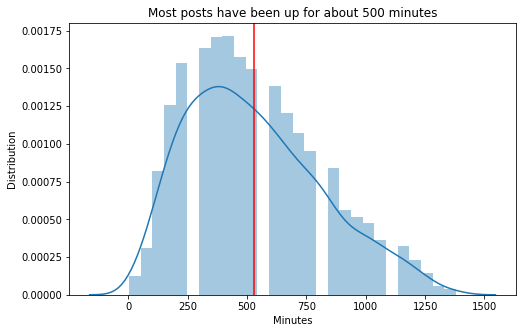

In [28]:
# Distribution of minutes
fig = plt.figure(figsize=(8,5))
ax=sns.distplot(data['minutes'])
ax.set(ylabel='Distribution', xlabel='Minutes', title='Most posts have been up for about 500 minutes')
plt.axvline(x=data['minutes'].mean(), color='r');

In [29]:
# Is there any relationship between minutes and number of posts?
data.corr()
# Not much.

,comments,minutes,AskReddit,big4,others
comments,1.000000,0.140185,0.391340,0.116103,-0.229717
minutes,0.140185,1.000000,-0.014320,0.025823,-0.020500
AskReddit,0.391340,-0.014320,1.000000,-0.026071,-0.276751
big4,0.116103,0.025823,-0.026071,1.000000,-0.953400
others,-0.229717,-0.020500,-0.276751,-0.953400,1.000000


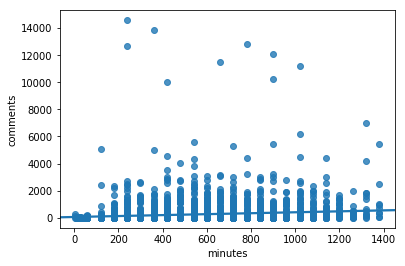

In [30]:
# There is almost no relationship between number of comments vs. number of minutes.
sns.regplot(x='minutes', y='comments', data=data);

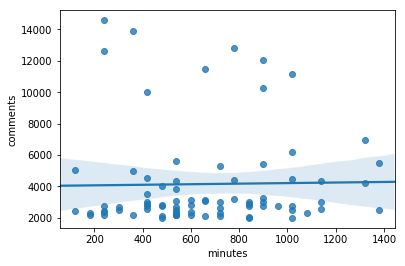

In [31]:
# This continues to be true among high-volume posts
sns.regplot(x='minutes', y='comments', data=data[data['comments']>2000]);

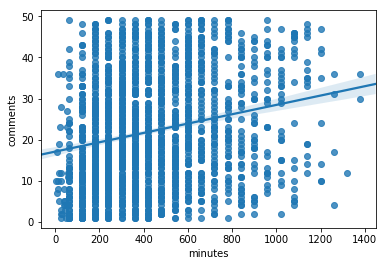

In [32]:
# This continues to be true among low-volume posts
sns.regplot(x='minutes', y='comments', data=data[data['comments']<50]);

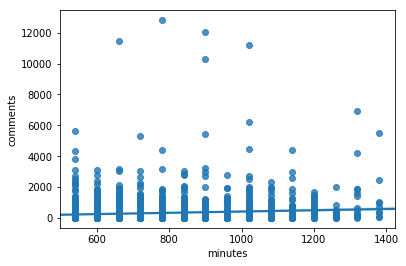

In [33]:
# It's also true in the opposite direction. Posts with high 'minutes' do not have any pattern to the number of comments.
sns.regplot(x='minutes', y='comments', data=data[data['minutes']>500]);

## Title

In [34]:
# Let's create a new variable, measuring the length of the title
data['length']=data['title'].apply(len)
data.head()

,title,subreddit,comments,minutes,which_sub,AskReddit,big4,others,length
0,"""@thebigjamesg: what kind of president doesn't...",TrumpCriticizesTrump,205,720,others,0,0,1,160
1,"""alright pinchy, my little bucket of badness, ...",lego,122,960,others,0,0,1,113
2,"""are you my dad?""",aww,10,120,others,0,0,1,17
3,"""behold a pale horse"" book from 1991, by bill ...",CBTS_Stream,4,180,others,0,0,1,149
4,"""can i have a 5p bag with that?"". ""sorry, we o...",britishproblems,366,660,others,0,0,1,138


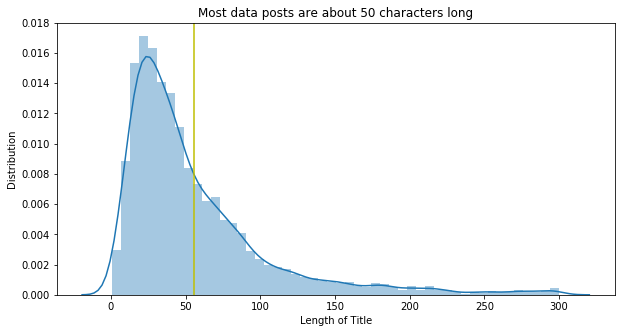

In [35]:
# What's its distribution?
fig = plt.figure(figsize=(10,5))
ax=sns.distplot(data['length'])
plt.axvline(x=data['length'].mean(), color='y')
ax.set(ylabel='Distribution', xlabel='Length of Title', title='Most data posts are about 50 characters long');

In [36]:
# Is there any relationship between title length and number of comments?
data.corr()
# Not really

,comments,minutes,AskReddit,big4,others,length
comments,1.000000,0.140185,0.391340,0.116103,-0.229717,0.160338
minutes,0.140185,1.000000,-0.014320,0.025823,-0.020500,0.000503
AskReddit,0.391340,-0.014320,1.000000,-0.026071,-0.276751,0.048966
big4,0.116103,0.025823,-0.026071,1.000000,-0.953400,0.101769
others,-0.229717,-0.020500,-0.276751,-0.953400,1.000000,-0.112605
length,0.160338,0.000503,0.048966,0.101769,-0.112605,1.000000


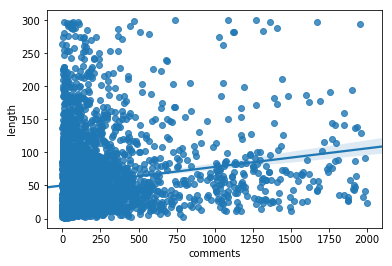

In [37]:
# Let's visualize that. There's only a slight relationship.
sns.regplot(x='comments', y='length', data=data[data['comments']<2000])

In [38]:
# A t-test confirms that there is no significant relationship here. Toggling the number of comments made no difference.
import scipy.stats as stats
stats.ttest_ind(data[data['comments']<2000]['comments'], data[data['comments']<2000]['length'])

Ttest_indResult(statistic=27.582098620545143, pvalue=4.0395009770205002e-161)

In [39]:
# A t-test confirms that there is no significant relationship for minutes, either.
import scipy.stats as stats
stats.ttest_ind(data['comments'], data['minutes'])

Ttest_indResult(statistic=-26.07806914841429, pvalue=6.7533428033360731e-145)

# Create the target variable

In [40]:
# First we need to create the outcome variable
data['over_under']=(data['comments']>data['comments'].median()).astype(int)
data.head()

,title,subreddit,comments,minutes,which_sub,AskReddit,big4,others,length,over_under
0,"""@thebigjamesg: what kind of president doesn't...",TrumpCriticizesTrump,205,720,others,0,0,1,160,1
1,"""alright pinchy, my little bucket of badness, ...",lego,122,960,others,0,0,1,113,1
2,"""are you my dad?""",aww,10,120,others,0,0,1,17,0
3,"""behold a pale horse"" book from 1991, by bill ...",CBTS_Stream,4,180,others,0,0,1,149,0
4,"""can i have a 5p bag with that?"". ""sorry, we o...",britishproblems,366,660,others,0,0,1,138,1


In [41]:
# Let's check out its distribution.
print(data['over_under'].describe()) # About 50% of the dataset is below the median, which is (duh) obvious

count    4793.000000
mean        0.498018
std         0.500048
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: over_under, dtype: float64


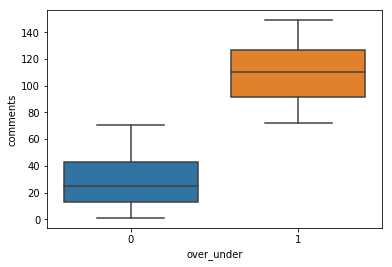

In [42]:
# This is sort of hard to visualize, but obviously the number of comments is lower for the "under" group.
sns.boxplot(x='over_under', y='comments', data=data[data['comments']<150])

Ttest_indResult(statistic=-128.8146436408006, pvalue=0.0)

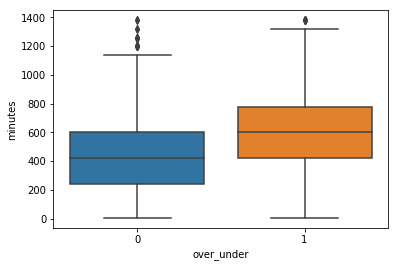

In [43]:
# Looks like "over" posts have slightly higher minutes, and this difference is significant.
sns.boxplot(x='over_under', y='minutes', data=data)
stats.ttest_ind(data['over_under'], data['minutes'])

Ttest_indResult(statistic=-77.274658471786708, pvalue=0.0)

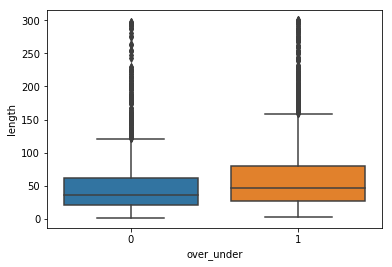

In [44]:
# Looks like "over" posts have slightly higher title lengths, and this difference is significant, too.
sns.boxplot(x='over_under', y='length', data=data)
stats.ttest_ind(data['over_under'], data['length'])

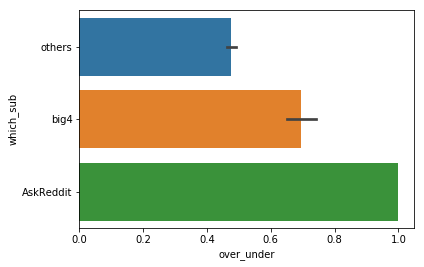

In [45]:
# How about with the type of subreddits? Yep.
sns.barplot(x='over_under', y='which_sub', data=data);

## Save dataset for the next jupyter notebook

In [46]:
data.head()

,title,subreddit,comments,minutes,which_sub,AskReddit,big4,others,length,over_under
0,"""@thebigjamesg: what kind of president doesn't...",TrumpCriticizesTrump,205,720,others,0,0,1,160,1
1,"""alright pinchy, my little bucket of badness, ...",lego,122,960,others,0,0,1,113,1
2,"""are you my dad?""",aww,10,120,others,0,0,1,17,0
3,"""behold a pale horse"" book from 1991, by bill ...",CBTS_Stream,4,180,others,0,0,1,149,0
4,"""can i have a 5p bag with that?"". ""sorry, we o...",britishproblems,366,660,others,0,0,1,138,1


In [47]:
# Save the cleaned, engineered data
data.to_csv(dirname + 'clean_data.csv', index=False)